In [1]:
import numpy as np, gym, mdptoolbox as mtools
from mdptoolbox.mdp import PolicyIteration, ValueIteration
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
import lib
from importlib import reload
import registry
reload(registry)
reload(lib)

<module 'lib' from '/Users/habbes/code/class/ml/assignment4/lib.py'>

In [2]:
registry.register_envs()

## Small grid problem

In [3]:
sm_env = gym.make('SmallLakeTough-v0')
sm_T, sm_R = lib.get_mdptbx_env_from_gym_env(sm_env)

In [4]:
sm_R.reshape((4, 4))

array([[ 0.,  0.,  0.,  0.],
       [ 0., -1.,  0., -1.],
       [ 0.,  0.,  0., -1.],
       [-1.,  0.,  0.,  1.]])

### Value Iteration

In [5]:
sm_vi = ValueIteration(sm_T, sm_R, 0.9)

In [6]:
sm_vi.run()

In [7]:
print("Iterations", sm_vi.iter)
print("Time", sm_vi.time)
print("Values")
print(np.array(sm_vi.V).reshape((4, 4)))
print(np.array(sm_vi.policy).reshape((4, 4)))

Iterations 72
Time 0.0043408870697021484
Values
[[ 0.45820811  0.26830949  0.16864572  0.12594408]
 [ 0.61181532 -9.99492471 -2.52035559 -9.99492471]
 [ 0.97024853  1.65301704  1.42503509 -9.99492471]
 [-9.99492471  3.1157367   5.61823585  9.99492471]]
[[0 3 3 3]
 [0 0 0 0]
 [3 1 0 0]
 [0 2 1 0]]


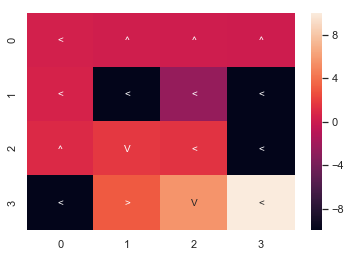

In [8]:
lib.plot_policy(sm_vi.policy, sm_vi.V)

### Policy iteration

In [9]:
sm_pi = PolicyIteration(sm_T, sm_R, 0.9, eval_type='iterative')

In [10]:
sm_pi.run()

In [11]:
print("Iterations", sm_pi.iter)
print("Time", sm_pi.time)
print("Values")
print(np.array(sm_pi.V).reshape((4, 4)))
print(np.array(sm_pi.policy).reshape((4, 4)))

Iterations 3
Time 0.005913734436035156
Values
[[ 0.46088634  0.27080835  0.17101764  0.12825028]
 [ 0.6145335  -9.99990739 -2.5204499  -9.99990739]
 [ 0.97304364  1.65592039  1.42739075 -9.99990739]
 [-9.99990739  3.11931927  5.62251419  9.99990739]]
[[0 3 3 3]
 [0 0 0 0]
 [3 1 0 0]
 [0 2 1 0]]


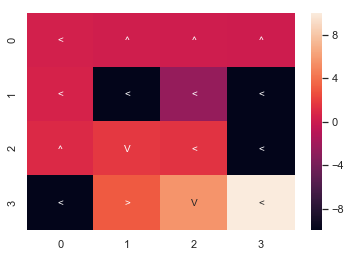

In [12]:
lib.plot_policy(sm_pi.policy, sm_pi.V)

In [13]:
np.argsort(np.array(sm_pi.V))

array([ 5,  7, 11, 12,  6,  3,  2,  1,  0,  4,  8, 10,  9, 13, 14, 15])

In [14]:
np.argsort(np.array(sm_vi.V))

array([ 5,  7, 11, 12,  6,  3,  2,  1,  0,  4,  8, 10,  9, 13, 14, 15])

## Large grid MDP

In [23]:
lg_env = gym.make('LargeLakeTough-v0')
lg_T, lg_R = lib.get_mdptbx_env_from_gym_env(lg_env)

In [24]:
lg_R.reshape((8, 8))

array([[ 0. ,  0. ,  0. ,  0. , -0.3,  0. , -1. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. , -1. ,  0.3,  0. ,  0. , -0.3],
       [ 0.3,  0. ,  0. ,  0. ,  0. , -1. ,  0.3,  0. ],
       [-0.3,  0. ,  0. , -1. ,  0. ,  0. ,  0. , -0.3],
       [ 0. , -1. , -1. ,  0. ,  0. ,  0. , -1. ,  0. ],
       [ 0. , -1. ,  0. ,  0. , -1. ,  0.3, -1. ,  0. ],
       [ 0. ,  0. ,  0. , -1. ,  0. ,  0. ,  0. ,  1. ]])

### Value iteration

In [40]:
lg_vi = ValueIteration(lg_T, lg_R, 0.9)

In [41]:
lg_vi.run()

In [42]:
print("Iterations", lg_vi.iter)
print("Time", lg_vi.time)
print("Values")
print(np.array(lg_vi.V).reshape((8, 8)))
print(np.array(lg_vi.policy).reshape((8, 8)))

Iterations 72
Time 0.004327058792114258
Values
[[ 3.97803952e-01  3.52725192e-01  2.93218318e-01  2.18762423e-01
  -2.60046583e-01 -9.65446305e-02 -9.99492471e+00  2.30195082e-01]
 [ 5.08651151e-01  4.19153129e-01  3.04343582e-01  1.66953502e-01
   1.13106431e-04  1.87812749e-01  3.78407321e-01  3.33648000e-01]
 [ 6.66334044e-01  4.92681831e-01  2.20913608e-01 -9.99492471e+00
  -1.76982969e-01  1.75190555e-01  5.80674123e-01  3.85989607e-01]
 [ 9.01127783e-01  4.37660355e-01 -3.08123250e-01 -4.63607255e+00
  -2.47017628e+00 -9.99492471e+00  1.01032421e+00  1.04170765e+00]
 [ 3.45942617e-02 -3.50043681e-01 -2.46607821e+00 -9.99492471e+00
  -1.53014541e+00 -1.11351562e+00  4.94055691e-01  1.28955533e+00]
 [ 1.86664416e-02 -9.99492471e+00 -9.99492471e+00 -4.33443376e+00
  -2.10387635e+00 -1.95652240e+00 -9.99492471e+00  2.64125224e+00]
 [ 1.08167575e-02 -9.99492471e+00 -4.08667499e+00 -5.06276346e+00
  -9.99492471e+00 -3.37496175e+00 -9.99492471e+00  5.16853697e+00]
 [ 7.59721491e-03 -6.3

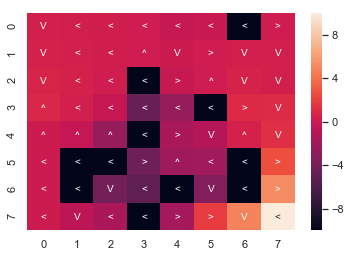

In [43]:
lib.plot_policy(lg_vi.policy, lg_vi.V)

### Policy iteration

In [44]:
lg_pi = PolicyIteration(lg_T, lg_R, 0.9)

In [45]:
lg_pi.run()

In [46]:
print("Iterations", lg_pi.iter)
print("Time", lg_pi.time)
print("Values")
print(np.array(lg_pi.V).reshape((8, 8)))
print(np.array(lg_pi.policy).reshape((8, 8)))

Iterations 5
Time 0.005731105804443359
Values
[[ 3.97277532e-01  3.52209371e-01  2.92704819e-01  2.18381781e-01
  -2.60074507e-01 -9.60037080e-02 -1.00000000e+01  2.32800907e-01]
 [ 5.08095509e-01  4.18610546e-01  3.03786747e-01  1.66794275e-01
   7.57579028e-04  1.89469576e-01  3.80670309e-01  3.36267976e-01]
 [ 6.65748103e-01  4.92090927e-01  2.20237409e-01 -1.00000000e+01
  -1.76448417e-01  1.76750095e-01  5.83065243e-01  3.88793027e-01]
 [ 9.00520715e-01  4.36964033e-01 -3.09135673e-01 -4.63911105e+00
  -2.47180629e+00 -1.00000000e+01  1.01292898e+00  1.04472204e+00]
 [ 3.38626766e-02 -3.51069988e-01 -2.46810180e+00 -1.00000000e+01
  -1.53113520e+00 -1.11390843e+00  4.96063924e-01  1.29277902e+00]
 [ 1.80725017e-02 -1.00000000e+01 -1.00000000e+01 -4.33734513e+00
  -2.10542219e+00 -1.95781642e+00 -1.00000000e+01  2.64508746e+00]
 [ 1.03145497e-02 -1.00000000e+01 -4.08964982e+00 -5.06624507e+00
  -1.00000000e+01 -3.37665352e+00 -1.00000000e+01  5.17299032e+00]
 [ 7.14084212e-03 -6.33

In [47]:
np.array(lg_pi.V) - np.array(lg_vi.V).mean()

array([ 2.15147287,  2.10640471,  2.04690016,  1.97257712,  1.49412083,
        1.65819163, -8.24580466,  1.98699625,  2.26229085,  2.17280589,
        2.05798209,  1.92098962,  1.75495292,  1.94366492,  2.13486565,
        2.09046332,  2.41994344,  2.24628627,  1.97443275, -8.24580466,
        1.57774692,  1.93094544,  2.33726058,  2.14298837,  2.65471606,
        2.19115937,  1.44505967, -2.88491571, -0.71761095, -8.24580466,
        2.76712432,  2.79891738,  1.78805802,  1.40312535, -0.71390646,
       -8.24580466,  0.22306014,  0.64028691,  2.25025926,  3.04697436,
        1.77226784, -8.24580466, -8.24580466, -2.58314978, -0.35122685,
       -0.20362108, -8.24580466,  4.3992828 ,  1.76450989, -8.24580466,
       -2.33545448, -3.31204973, -8.24580466, -1.62245818, -8.24580466,
        6.92718566,  1.76133618,  1.12098507,  0.19920717, -8.24580466,
       -0.08664791,  3.58385419,  6.59360124, 11.75419534])

In [48]:
lg_pi.policy == lg_vi.policy

True

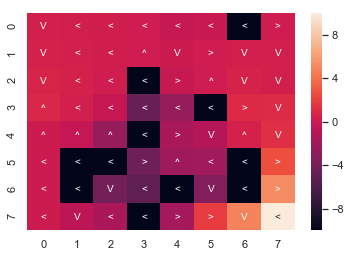

In [49]:
lib.plot_policy(lg_pi.policy, lg_pi.V)

In [56]:
def compare_vi_pi(T, R, gamma):
    vi = ValueIteration(T, R, gamma)
    pi = PolicyIteration(T, R, gamma)
    vi.run()
    pi.run()
    same = vi.policy == pi.policy
    if same:
        print("Same policy from VI and PI")
    else:
        lib.plot_policy(vi.policy, vi.V)
        plt.show()
        lib.plot_policy(pi.policy, pi.V)
        plt.show()

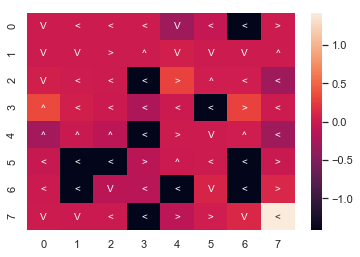

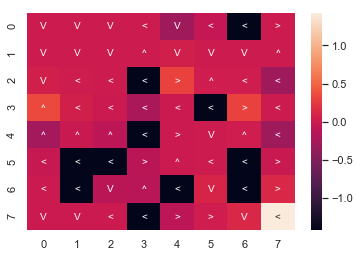

In [62]:
compare_vi_pi(lg_T, lg_R, 0.3)